In [2]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import pymc
import emcee
sns.set_style("whitegrid")
%matplotlib inline

/Users/abhisheksubramanian/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10*np.random.rand(N))
yerr = 0.1+0.5*np.random.rand(N)
y = m_true*x+b_true
y += np.abs(f_true*y) * np.random.randn(N)
y += yerr * np.random.randn(N)

In [4]:
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_true, b_true, np.log(f_true)], args=(x, y, yerr))
m_ml, b_ml, lnf_ml = result["x"]
def lnprior(theta):
    m, b, lnf = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < lnf < 1.0:
        return 0.0
    return -np.inf

def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)


ndim, nwalkers = 3, 100
pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]


pos

[array([-0.88200262,  4.01971625, -0.45628352]),
 array([-0.88216936,  4.0198286 , -0.45620773]),
 array([-0.88232804,  4.01975437, -0.45618674]),
 array([-0.88216007,  4.01984032, -0.45629913]),
 array([-0.88236945,  4.01974177, -0.45623465]),
 array([-0.88215516,  4.0197558 , -0.45626201]),
 array([-0.88225627,  4.01982733, -0.45630244]),
 array([-0.88240969,  4.01996085, -0.45624979]),
 array([-0.88227898,  4.01960062, -0.456105  ]),
 array([-0.88223657,  4.01981804, -0.45631503]),
 array([-0.88221602,  4.0195961 , -0.45623954]),
 array([-0.88226563,  4.01976437, -0.45628231]),
 array([-0.88231159,  4.01978277, -0.45625133]),
 array([-0.88210009,  4.01985874, -0.4562968 ]),
 array([-0.882228  ,  4.01981734, -0.45619024]),
 array([-0.88215301,  4.01956024, -0.45619198]),
 array([-0.88226257,  4.01964649, -0.45618793]),
 array([-0.882172  ,  4.01984853, -0.45628923]),
 array([-0.88235891,  4.01981617, -0.45635452]),
 array([-0.88219057,  4.01976855, -0.45625484]),
 array([-0.88221309,

In [5]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))

In [6]:
sampler.run_mcmc(pos, 500)

(array([[ -9.41448560e-01,   4.27680467e+00,  -7.90608703e-01],
        [ -9.48988748e-01,   4.28670549e+00,  -5.70977431e-01],
        [ -9.40735020e-01,   4.45141160e+00,  -4.92096350e-01],
        [ -8.78328964e-01,   4.02248221e+00,  -3.73869396e-01],
        [ -8.29422018e-01,   3.67146372e+00,  -6.13397302e-01],
        [ -8.82191942e-01,   3.82243775e+00,  -4.62758235e-01],
        [ -1.01684984e+00,   4.75668601e+00,  -6.38808104e-01],
        [ -7.44597509e-01,   3.42150984e+00,  -2.08403313e-01],
        [ -9.53442946e-01,   4.38260853e+00,  -5.41603717e-01],
        [ -7.92287814e-01,   3.46405601e+00,  -1.30471130e-01],
        [ -8.92322109e-01,   4.08789280e+00,  -7.05457178e-01],
        [ -9.29490982e-01,   4.17775769e+00,  -5.77257406e-01],
        [ -1.02723420e+00,   4.55076420e+00,  -6.45234336e-01],
        [ -8.61943976e-01,   4.01219687e+00,  -1.58365752e-01],
        [ -1.05711886e+00,   4.92197098e+00,  -6.48042647e-01],
        [ -9.07897281e-01,   4.31790061e

In [7]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

In [8]:
samples.shape

(45000, 3)

Plotting test


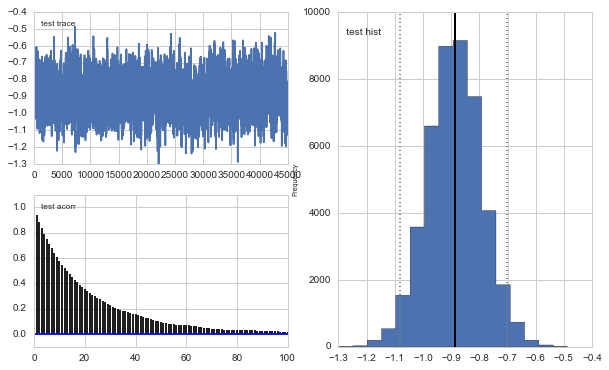

In [9]:
pymc.Matplot.plot(samples[:,0],"test")

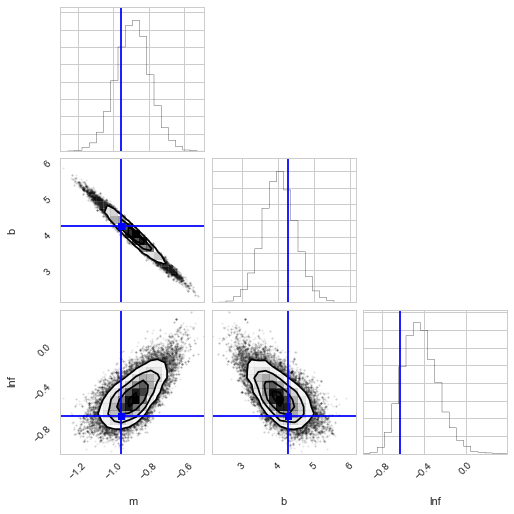

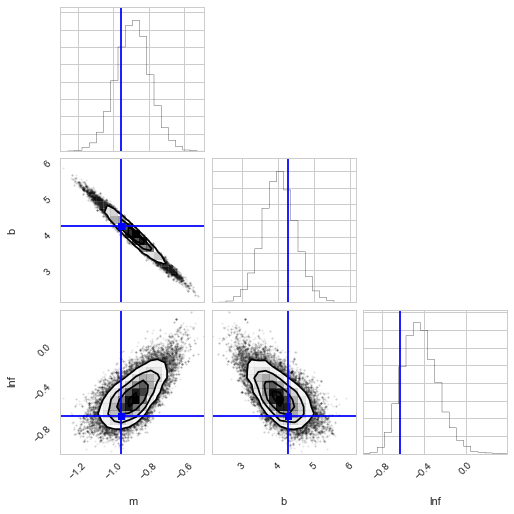

In [11]:
import corner

corner.corner(samples,truths=(m_true,b_true, np.log(f_true)),truth_color="b",labels=("m","b","lnf"))

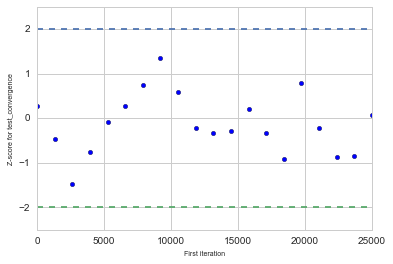

In [92]:
pymc.Matplot.geweke_plot(pymc.geweke(sampler.flatchain[:,0]),"test_convergence")

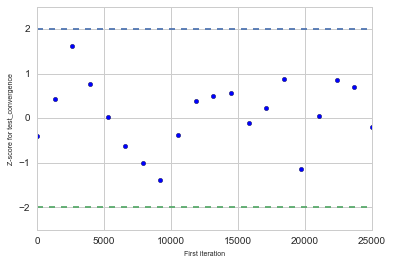

In [93]:
pymc.Matplot.geweke_plot(pymc.geweke(sampler.flatchain[:,1]),"test_convergence")

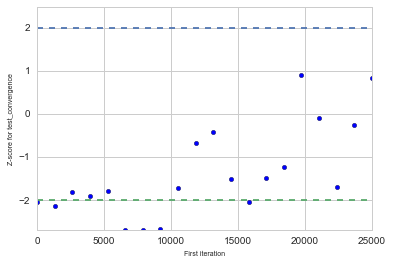

In [94]:
pymc.Matplot.geweke_plot(pymc.geweke(sampler.flatchain[:,2]),"test_convergence")

Plotting test1


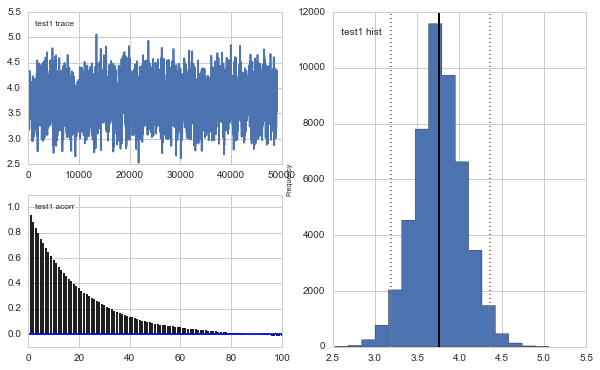

In [71]:
pymc.Matplot.plot(samples[:,1],"test1")

Plotting test


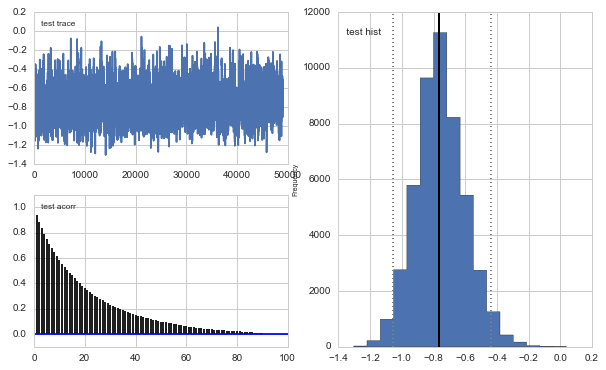

In [72]:
pymc.Matplot.plot(samples[:,2],"test")

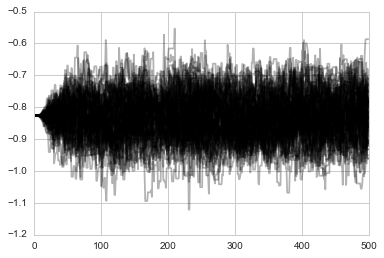

In [73]:
res=plt.plot(sampler.chain[:,:,0].T, '-', color='k', alpha=0.3)
plt.show()

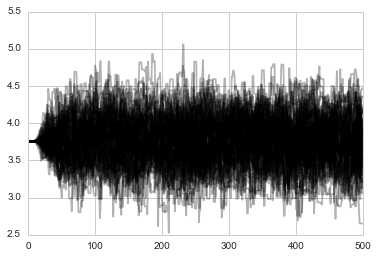

In [74]:
plt.plot(sampler.chain[:,:,1].T, '-', color='k', alpha=0.3)

plt.show()

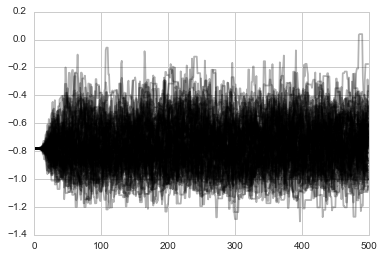

In [75]:
plt.plot(sampler.chain[:,:,2].T, '-', color='k', alpha=0.3)

plt.show()

<Container object of 3 artists>

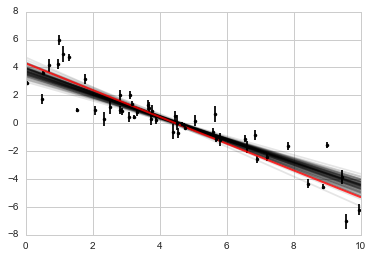

In [76]:
xl = np.array([0, 10])
for m, b, lnf in samples[np.random.randint(len(samples), size=100)]:
    plt.plot(xl, m*xl+b, color="k", alpha=0.1)
plt.plot(xl, m_true*xl+b_true, color="r", lw=2, alpha=0.8)
plt.errorbar(x, y, yerr=yerr, fmt=".k")


In [77]:
samples[:, 2] = np.exp(samples[:, 2])
m_mcmc, b_mcmc, f_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))

In [78]:
m_mcmc,b_mcmc,f_mcmc

((-0.82832073549260654, 0.060457724193358819, 0.061826420247779845),
 (3.7601436240654467, 0.28346280891841058, 0.27851516923990038),
 (0.46411663795275243, 0.082444748863943429, 0.060396893264189622))

In [37]:
m_true,b_true,f_true

(-0.9594, 4.294, 0.534)

In [95]:
import numpy as np

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10*np.random.rand(N))
yerr = 0.1+0.5*np.random.rand(N)
y = m_true*x+b_true
y += np.abs(f_true*y) * np.random.randn(N)
y += yerr * np.random.randn(N)

A = np.vstack((np.ones_like(x), x)).T
C = np.diag(yerr * yerr)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))


def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_true, b_true, np.log(f_true)], args=(x, y, yerr))
m_ml, b_ml, lnf_ml = result["x"]


In [96]:
def lnprior(theta):
    m, b, lnf = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < lnf < 1.0:
        return 0.0
    return -np.inf

def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)


In [97]:
ndim, nwalkers = 3, 100
pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [111]:
import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))
sampler.run_mcmc(pos, 1000)

(array([[-1.09300312,  4.88011563, -0.65176378],
        [-1.30394071,  5.84575811, -0.98325398],
        [-1.05518743,  4.63516601, -0.45522014],
        [-1.14076998,  4.8698618 , -0.73172581],
        [-1.12155088,  4.93037869, -1.00420197],
        [-1.10174864,  4.82826925, -0.61066083],
        [-1.1410336 ,  5.07556645, -0.76248926],
        [-1.16416279,  4.97356712, -0.69112006],
        [-1.18995512,  5.12006357, -0.76312188],
        [-1.05062568,  4.70150861, -0.65821851],
        [-1.19302532,  5.4071238 , -0.90523722],
        [-1.01202185,  4.37878379, -0.4960361 ],
        [-0.98353383,  4.14259132, -0.52736703],
        [-1.18462724,  5.29794983, -0.95420323],
        [-1.17491669,  5.05980354, -0.98147995],
        [-1.12297367,  4.97857223, -0.83048268],
        [-1.17517695,  5.08985856, -0.87303906],
        [-1.06308619,  4.62834125, -1.01945297],
        [-1.11988447,  4.95890862, -0.97991462],
        [-1.19675363,  5.37750025, -0.8307024 ],
        [-1.18543115

In [112]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))


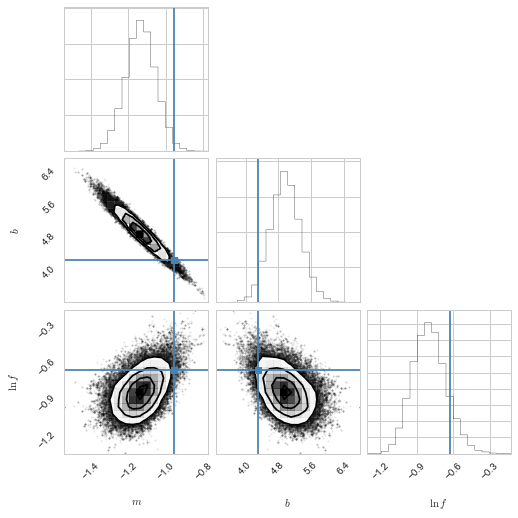

In [113]:
import corner
fig = corner.corner(samples, labels=["$m$", "$b$", "$\ln\,f$"],
                      truths=[m_true, b_true, np.log(f_true)])

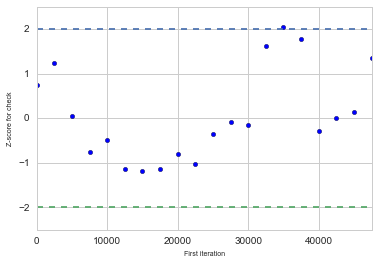

In [114]:
pymc.Matplot.geweke_plot(pymc.geweke(samples[:,0]),"check")

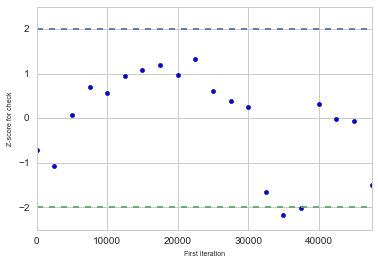

In [115]:
pymc.Matplot.geweke_plot(pymc.geweke(samples[:,1]),"check")

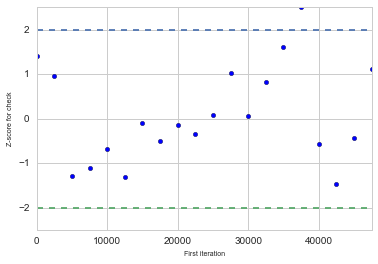

In [116]:
pymc.Matplot.geweke_plot(pymc.geweke(samples[:,2]),"check")

Plotting sample0


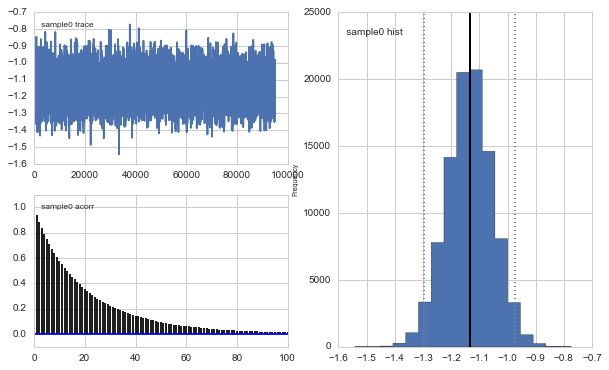

In [117]:
pymc.Matplot.plot(samples[:,0],"sample0")

Plotting sample1


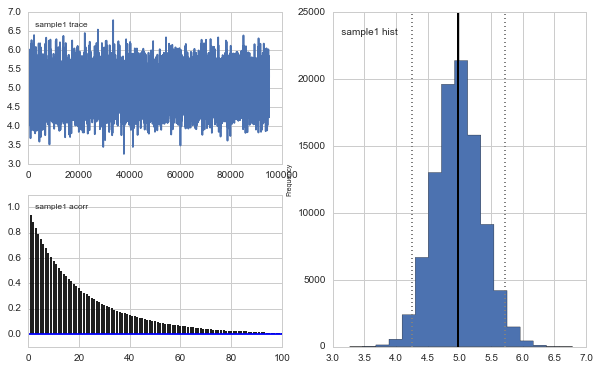

In [118]:
pymc.Matplot.plot(samples[:,1],"sample1")

Plotting sample2


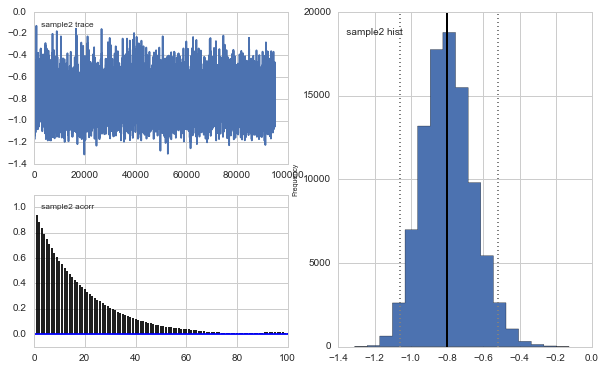

In [119]:
pymc.Matplot.plot(samples[:,2],"sample2")

In [120]:
import acor
print([acor.acor(np.mean(sampler.chain[:,:,i], axis=0))[0]
       for i in range(3)])

[7.701952739711191, 8.073606570002903, 4.374536863529048]
